#Actividad 5

Esta semana nos centraremos en el Análisis de Series de Tiempo. Una serie de tiempo es cualquier conjunto de datos ordenados en el tiempo a intervalos iguales. Hemos visto que los datos climatológicos que descargamos del Servicio Meteorológico Nacional son datos diarios, se tiene una serie de tiempo para la Precipitación, una para la Evaporación, y las de las Temperaturas (Máxima y Mínima).

In [1]:
#Importamos las bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# Apoyo para calcular la estacionalidad, tendencia y residuo
import statsmodels.api as sm
# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteo
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/Eduardo-Lares-Miranda/FisicaComputacional1/master/Actividad%204/Datosdiarios.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'TMax', 'TMin']
df_granados = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=2, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_son = df_granados.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_sono = df_son.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'TMax', 'TMin']
for cols in cols_list:
  df_sono[cols] = pd.to_numeric(df_sono[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_sonor = df_sono.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_sonor['Fecha']=pd.to_datetime(df_sonor['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_sonor['Año'] = df_sonor['Fecha'].dt.year
df_sonor['Mes'] = df_sonor['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_sonor.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12488 entries, 0 to 12487
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12488 non-null  datetime64[ns]
 1   Precip  12475 non-null  float64       
 2   Evap    0 non-null      float64       
 3   TMax    12435 non-null  float64       
 4   TMin    12457 non-null  float64       
 5   Año     12488 non-null  int64         
 6   Mes     12488 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 683.1+ KB
       Fecha  Precip  Evap  TMax  TMin   Año  Mes
0 1980-11-06     0.0   NaN  29.0   NaN  1980  Nov
1 1980-11-07     0.0   NaN  32.0   9.0  1980  Nov
2 1980-11-08     0.0   NaN  31.0   8.0  1980  Nov
3 1980-11-09     0.0   NaN  31.0   7.0  1980  Nov
4 1980-11-10     0.0   NaN  30.0   9.0  1980  Nov
           Fecha  Precip  Evap  TMax  TMin   Año  Mes
12483 2016-03-27     0.0   NaN  33.0  13.0  2016  Mar
12484

Creamos nuestra primer serie de tiempo para utilizar el DataFrame

In [4]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_granados = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_granados = df_meteo_granados.set_index('Fecha')

# Verificamos
df_meteo_granados.info()
print(df_meteo_granados.head())
print(df_meteo_granados.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12488 entries, 1980-11-06 to 2016-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  12475 non-null  float64
 1   Evap    0 non-null      float64
 2   TMax    12435 non-null  float64
 3   TMin    12457 non-null  float64
 4   Año     12488 non-null  int64  
 5   Mes     12488 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 682.9+ KB
            Precip  Evap  TMax  TMin   Año  Mes
Fecha                                          
1980-11-06     0.0   NaN  29.0   NaN  1980  Nov
1980-11-07     0.0   NaN  32.0   9.0  1980  Nov
1980-11-08     0.0   NaN  31.0   8.0  1980  Nov
1980-11-09     0.0   NaN  31.0   7.0  1980  Nov
1980-11-10     0.0   NaN  30.0   9.0  1980  Nov
            Precip  Evap  TMax  TMin   Año  Mes
Fecha                                          
2016-03-27     0.0   NaN  33.0  13.0  2016  Mar
2016-03-28     0.0   NaN  30.0  12.

In [5]:
# Seleccionaremos los 36 años activos de la estacion 
df_36 = df_meteo_granados[(df_meteo_granados['Año'] >= 1980) & (df_meteo_granados['Año'] < 2016)]

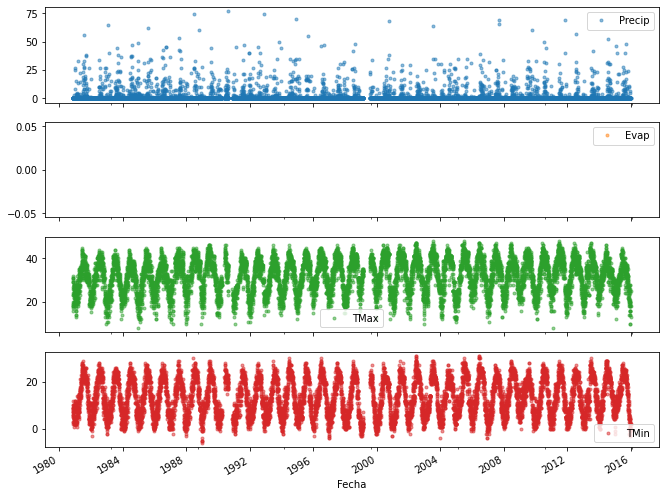

In [7]:
# Podemos visualizar la colección de 36 años activos y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'TMax', 'TMin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'TMax ºC', 'TMin (ºC)']
axes = df_36[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)

#Actividad 1

Explora tus datos de Precipitación los últimos años 1990- fin de datos. Grafica todo el rango de datos utilizando la función df.plot(). Analiza un año específico completo. Grafica la estacionalidad de tus datos por mes utilizando la función sns.boxplot().

Variación en Precipitación promedio 1980-2016 : 1.2599321705426356


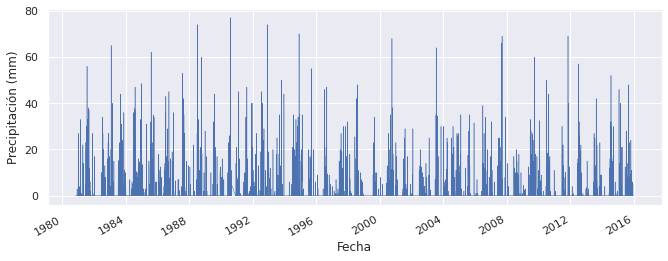

In [9]:
sns.set(rc={'figure.figsize':(11, 4)})
Precip_ave_36 = df_36.Precip.mean()


df_36['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');


print('Variación en Precipitación promedio 1980-2016 :', Precip_ave_36)

Text(0, 0.5, 'Precip (mm)')

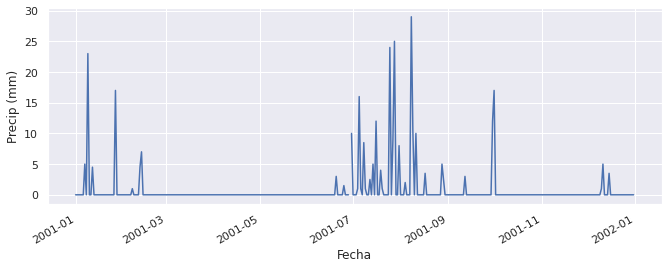

In [10]:
# Investigando un año de datos
ax = df_36.loc['2001', 'Precip'].plot()
ax.set_ylabel('Precip (mm)')

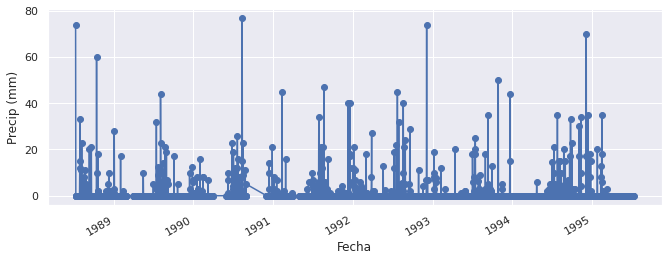

In [13]:
# Investigando un periodo de datos
ax = df_36.loc['1988-07-10':'1995-07-10', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

Text(0, 0.5, 'Precip (mm)')

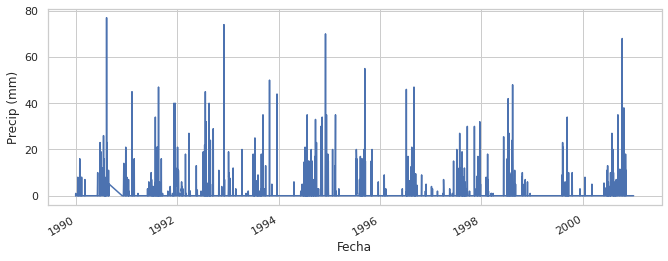

In [16]:
# Investigando un rango de datos
ax = df_36.loc['1990':'2000', 'Precip'].plot()
ax.set_ylabel('Precip (mm)')

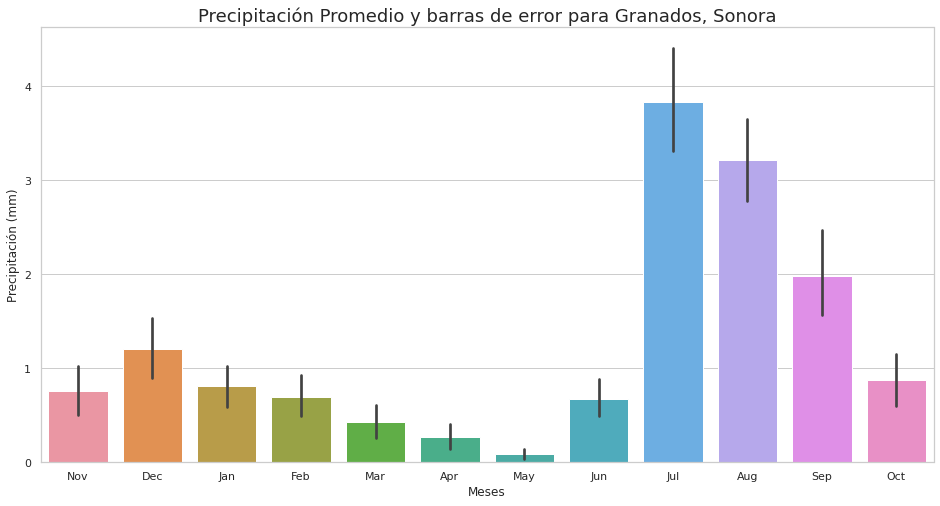

In [15]:
# Gráfica de Precipitación de los 36 años agrupada por mes
sns.set_style('whitegrid')

#Aumentamos el tamaño de la gráfica
plt.figure(figsize=(16,8))

# la gráfica
g =sns.barplot(x='Mes', y='Precip', data=df_36);

#Etiquetas
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Granados, Sonora', fontsize=18)

plt.show()

#Actividad 2

Explora tus datos de Temperaturas Máxima y Mínima de los últimos 30 años datos a partir de 1990. Trata de construir dos subgráficas contiguas.

Grafica todo el rango de datos utilizando la función df.plot(), incluye una línea punteada mostrando el promedio. Analiza un año específico completo para las dos Temperaturas. Grafica la estacionalidad filtrando tus datos por mes y utilizando la función sns.boxplot(), incluye una línea punteada mostrando el promedio.

Variación ºC TMax promedio 86-16 : 31.97973268529769


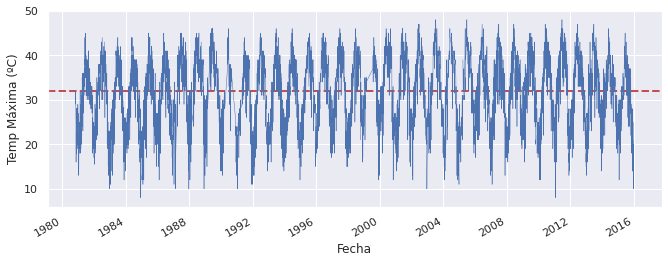

In [18]:
# Graficamos la TMax de los últimos 30 años (1986 hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Tmax_ave_36 = df_36.TMax.mean()
plt.axhline(Tmax_ave_36, color = 'r', linestyle='--', linewidth=2);
df_36['TMax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
print('Variación ºC TMax promedio 86-16 :', Tmax_ave_36)

Variación ºC TMin promedio 86-16 : 13.467944363577555


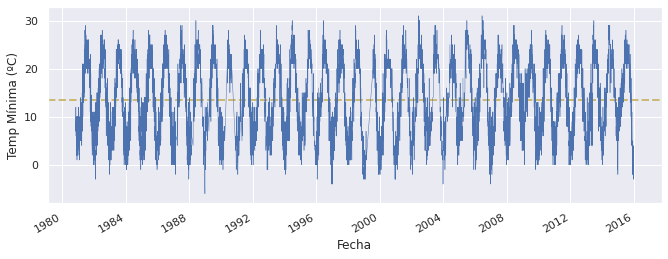

In [19]:
# Graficamos la TMin de los últimos 30 años (1986-hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Tmin_ave_36 = df_36.TMin.mean()
plt.axhline(Tmin_ave_36, color = 'y', linestyle='--', linewidth=2);

df_36['TMin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
print('Variación ºC TMin promedio 86-16 :', Tmin_ave_36)

Analizando para Tmax y Tmin

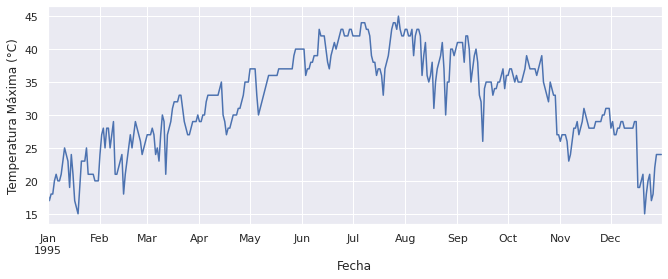

In [20]:
# Investigando un año de datos
ax = df_36.loc['1995', 'TMax'].plot()
ax.set_ylabel('Temperatura Máxima (°C)');

Text(0, 0.5, 'Temperatura Mínima (°C)')

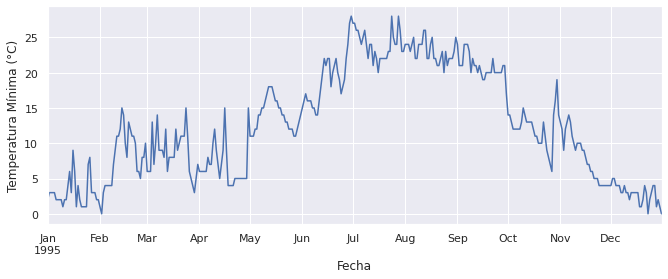

In [22]:
# Investigando un año de datos
ax = df_36.loc['1995', 'TMin'].plot()
ax.set_ylabel('Temperatura Mínima (°C)')

Analizando la estacionalidad por mes

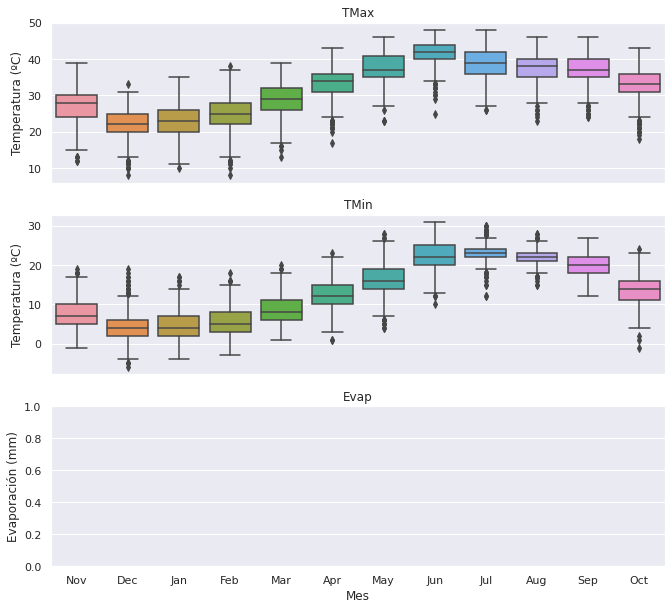

In [24]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['TMax', 'TMin', 'Evap'], axes):
  sns.boxplot(data=df_36, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temperatura (ºC)')
  else: 
    ax.set_ylabel('Evaporación (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#Actividad 3

Realizar el mismo análisis que en la actividad 2, pero para la variable de Evaporación

Variación mm Evaporación promedio 86-16 : nan


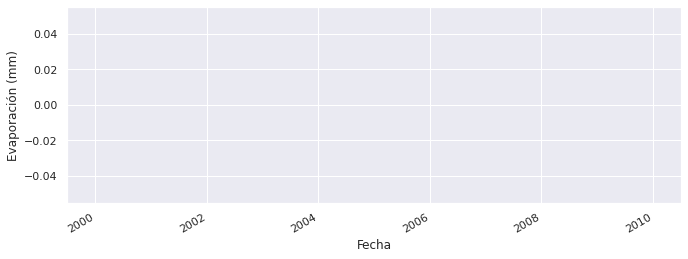

In [25]:
# Graficamos la Evaporación de los últimos 30 años (1986 hasta 2016)
sns.set(rc={'figure.figsize':(11, 4)})
Evap_ave_36 = df_36.Evap.mean()
plt.axhline(Evap_ave_36, color = 'y', linestyle='--', linewidth=2);
df_36['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
print('Variación mm Evaporación promedio 86-16 :', Evap_ave_36)

Text(0, 0.5, 'Evaporación (mm)')

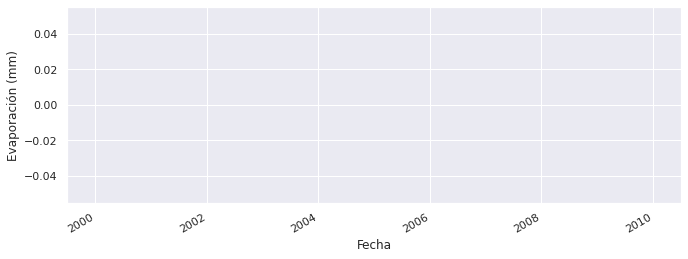

In [26]:
#Investigando un rango de datos de evaporación
ax = df_36.loc['2000':'2005', 'Evap'].plot()
ax.set_ylabel('Evaporación (mm)')

#Actividad 4

Crea nuevos DataFrames de las Temperaturas y la Evaporación con promedios móviles de 7, 30 y 365 días, utilizando la función df.rolling(). Explora tus datos: Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. Explora para 10 o más años de datos, contrastando los datos diarios con las gráficas de promedio móvil de 365 días.

In [27]:
# Suavizando la curva de TMax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'TMax', 'TMin']
df_36_7d = df_36[data_cols].rolling(7, center=True,min_periods=1).mean()
df_36_30d = df_36[data_cols].rolling(30, center=True, min_periods=1).mean()
df_36_365d = df_36[data_cols].rolling(365, center=True, min_periods=1).mean()

df_36_365d

,Evap,TMax,TMin
Fecha,,,
1980-11-06,NaN,25.360656,8.186813
1980-11-07,NaN,25.402174,8.240437
1980-11-08,NaN,25.448649,8.271739
1980-11-09,NaN,25.505376,8.297297
1980-11-10,NaN,25.529412,8.360215
...,...,...,...
2015-12-27,NaN,30.229947,15.770053
2015-12-28,NaN,30.177419,15.720430
2015-12-29,NaN,30.124324,15.670270


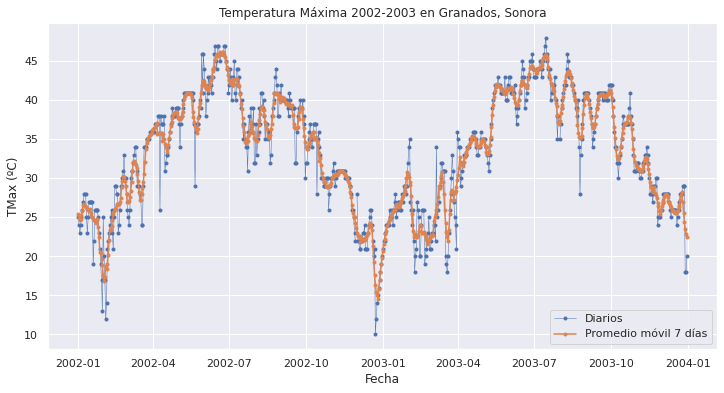

In [28]:
#Fechas de inicio y fin para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_36_7d.loc[start:end, 'TMax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Máxima 2002-2003 en Granados, Sonora')
ax.legend();

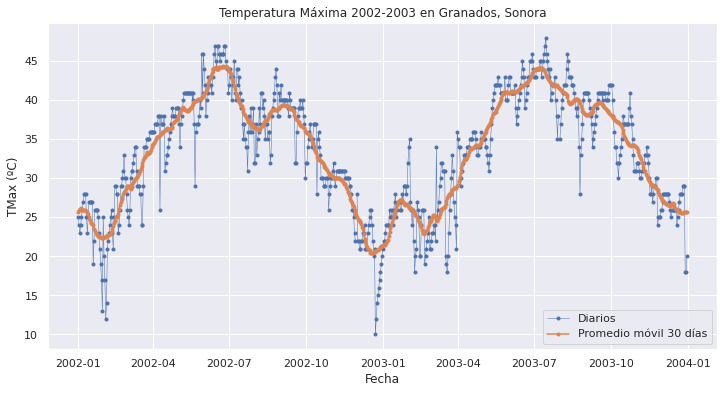

In [29]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_36_30d.loc[start:end, 'TMax'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Máxima 2002-2003 en Granados, Sonora')
ax.legend();

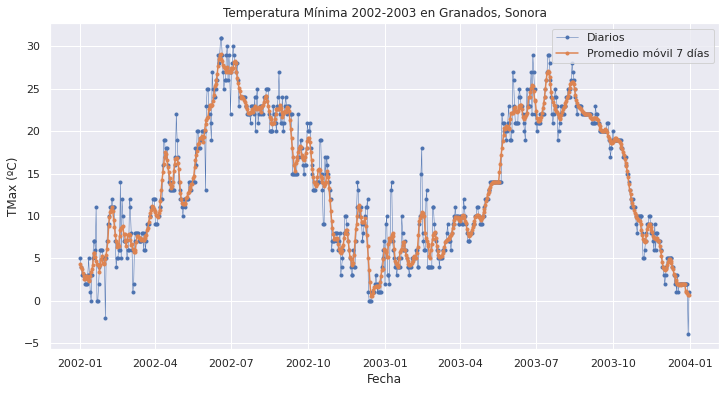

In [30]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_36_7d.loc[start:end, 'TMin'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Mínima 2002-2003 en Granados, Sonora')
ax.legend();

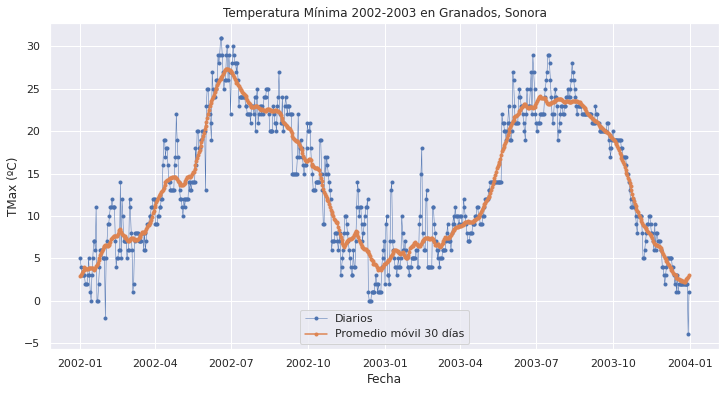

In [31]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMin'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_36_30d.loc[start:end, 'TMin'], marker='.', linestyle='-', label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('TMax (ºC)')
ax.set_title('Temperatura Mínima 2002-2003 en Granados, Sonora')
ax.legend();

Temperatura Máxima

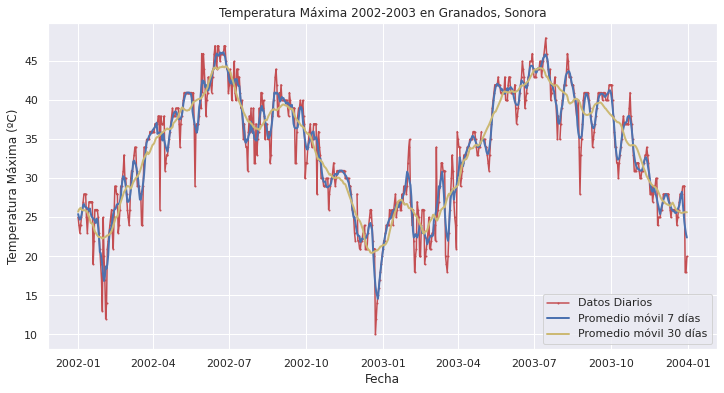

In [32]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMax'],
marker='.', markersize=2, linestyle='-', color='r',label='Datos Diarios')
ax.plot(df_36_7d.loc[start:end, 'TMax'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_36_30d.loc[start:end, 'TMax'], linestyle='-', color= 'y', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.set_title('Temperatura Máxima 2002-2003 en Granados, Sonora')
ax.legend();


Temperaturas Mínimas

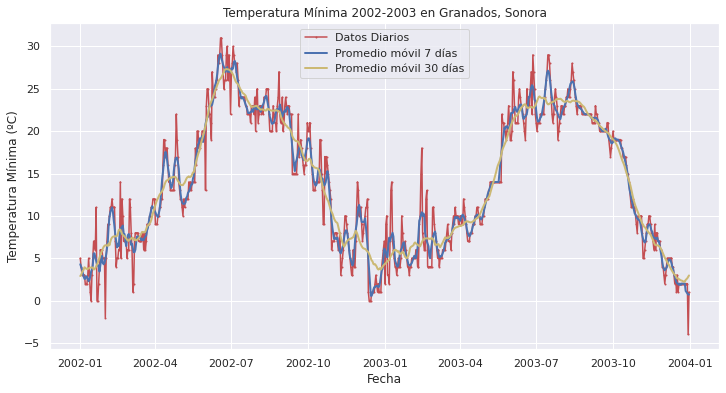

In [33]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMin'],
marker='.', markersize=2, linestyle='-', color='r',label='Datos Diarios')
ax.plot(df_36_7d.loc[start:end, 'TMin'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_36_30d.loc[start:end, 'TMin'], linestyle='-', color= 'y', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Mínima (ºC)')
ax.set_title('Temperatura Mínima 2002-2003 en Granados, Sonora')
ax.legend();


Evaporación

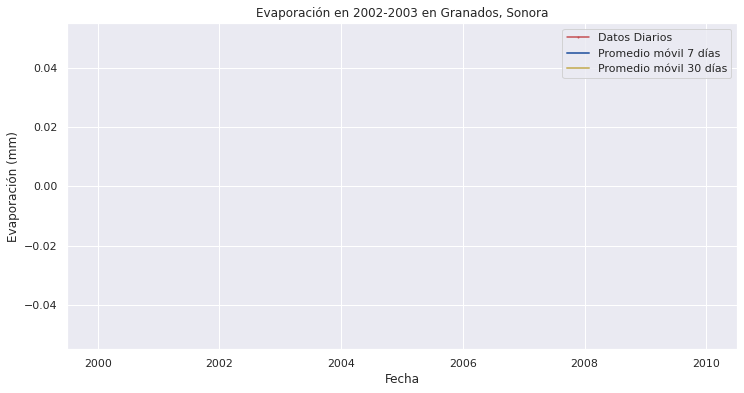

In [34]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2002-01', '2003-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='r',label='Datos Diarios')
ax.plot(df_36_7d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 7 días')
ax.plot(df_36_30d.loc[start:end, 'Evap'], linestyle='-', color= 'y', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación en 2002-2003 en Granados, Sonora')
ax.legend();

Análisis a 10 años

Temperatura Máxima

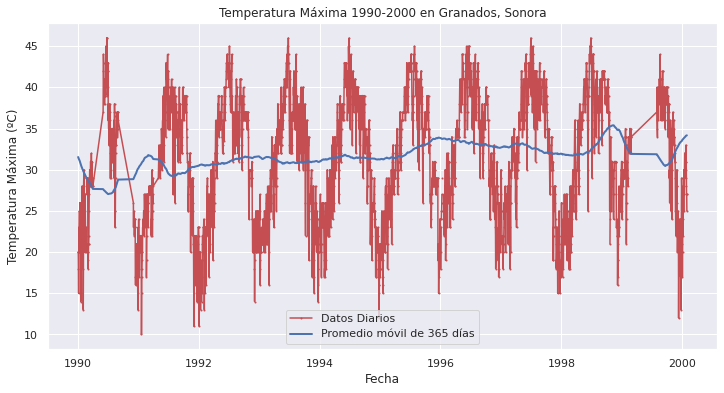

In [35]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1990-01', '2000-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMax'],
marker='.', markersize=2, linestyle='-', color='r',label='Datos Diarios')
ax.plot(df_36_365d.loc[start:end, 'TMax'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Máxima (ºC)')
ax.set_title('Temperatura Máxima 1990-2000 en Granados, Sonora')
ax.legend();

Temperatura Mínima

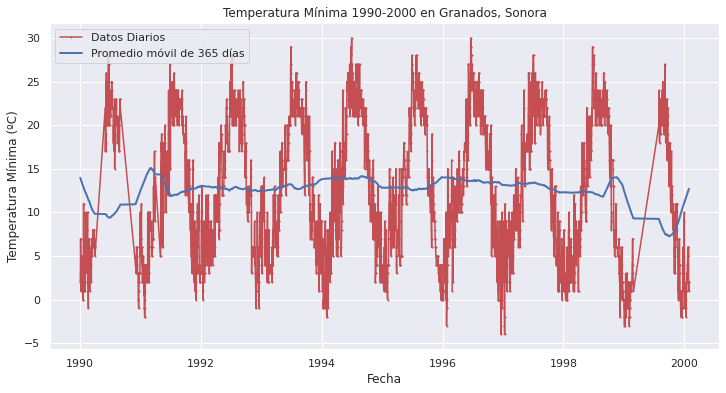

In [36]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1990-01', '2000-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'TMin'],
marker='.', markersize=2, linestyle='-', color='r',label='Datos Diarios')
ax.plot(df_36_365d.loc[start:end, 'TMin'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura Mínima (ºC)')
ax.set_title('Temperatura Mínima 1990-2000 en Granados, Sonora')
ax.legend();


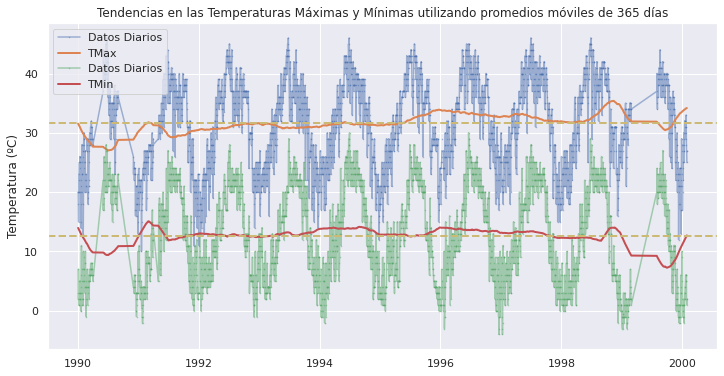

In [37]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2000-01'

fig, ax = plt.subplots()
for nm in ['TMax', 'TMin']:
    ax.plot(df_36.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_36_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_36.loc[start:end, nm].mean(), color = 'y', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Máximas y Mínimas utilizando promedios móviles de 365 días');

Evaporación

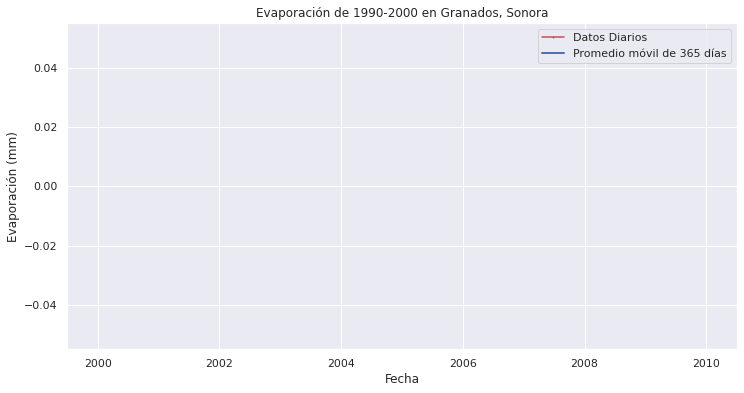

In [38]:
# Fechas de inicio y fin, para filtrar la información
start, end = '1990-01', '2000-01'

# Contraste de la gráfica de datos diarios y promedio móvil de 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_36.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='r',label='Datos Diarios')
ax.plot(df_36_365d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Evaporación de 1990-2000 en Granados, Sonora')
ax.legend();

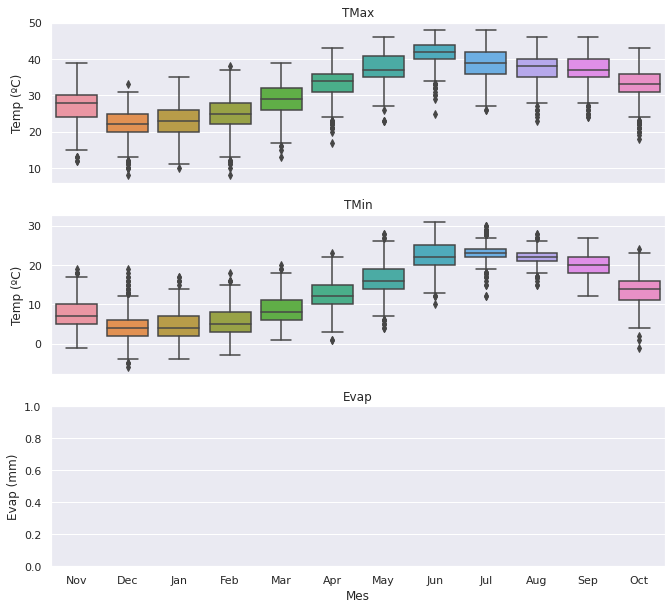

In [39]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['TMax', 'TMin', 'Evap'], axes):
  sns.boxplot(data=df_36, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

#Actividad 5

Utiliza la biblioteca statsmodels.tsa de Python, para realizar una descomposición de una serie de tiempo: Serie Observada = Tendencia + Estacionalidad + Residuo. Aplica la función seasonal_decompose para lograr esto, a los datos de Temperaturas Tmax y Tmin, y si tienes datos de Evaporación, selecciona un periodo que haya datos. La función de seasonal_decompose aplica su propio promedio móvil a las series de datos para su análisis.

Temperatura Máxima

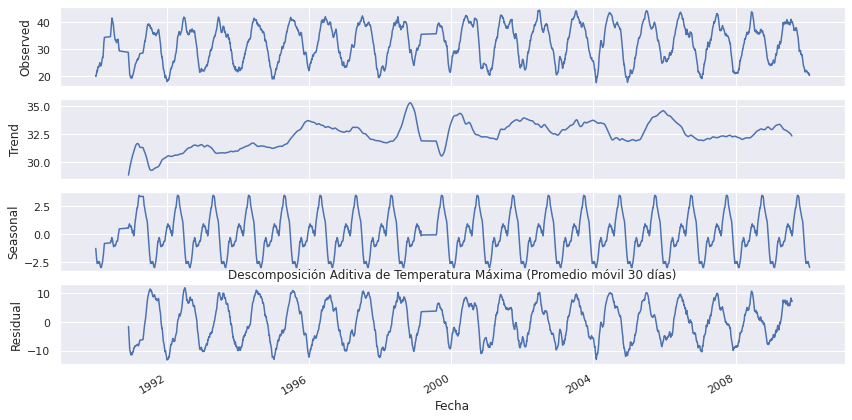

In [40]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2010-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_36_30d.loc[start:end, 'TMax'].interpolate(), freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (Promedio móvil 30 días)');

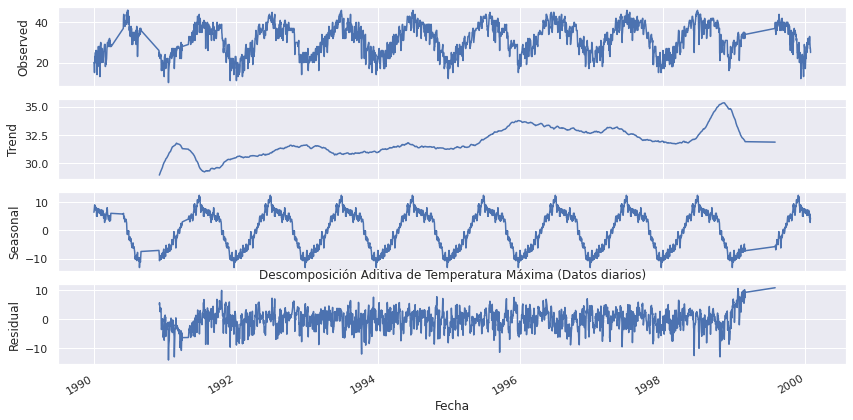

In [41]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2000-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_36.loc[start:end, 'TMax'].interpolate(), freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Máxima (Datos diarios)');

In [42]:
resTmax.trend.describe()

count    2977.000000
mean       31.886993
std         1.208880
min        28.949315
25%        31.069863
50%        31.612329
75%        32.821918
max        35.369863
Name: TMax, dtype: float64

Temperatura Mínima

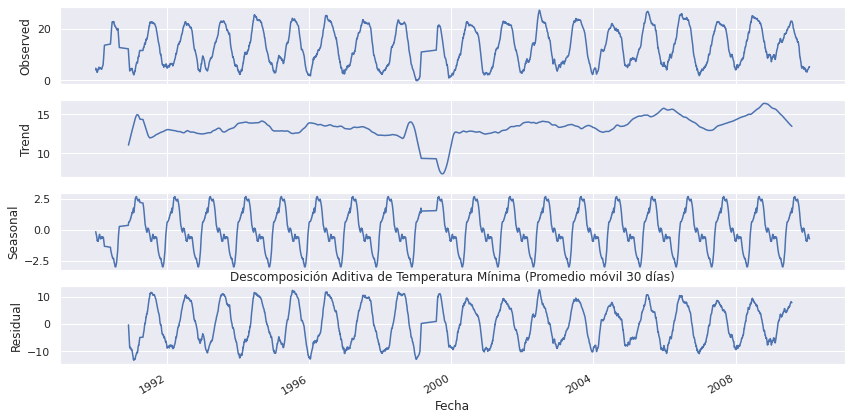

In [43]:
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2010-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_36_30d.loc[start:end, 'TMin'].interpolate(), freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Mínima (Promedio móvil 30 días)');

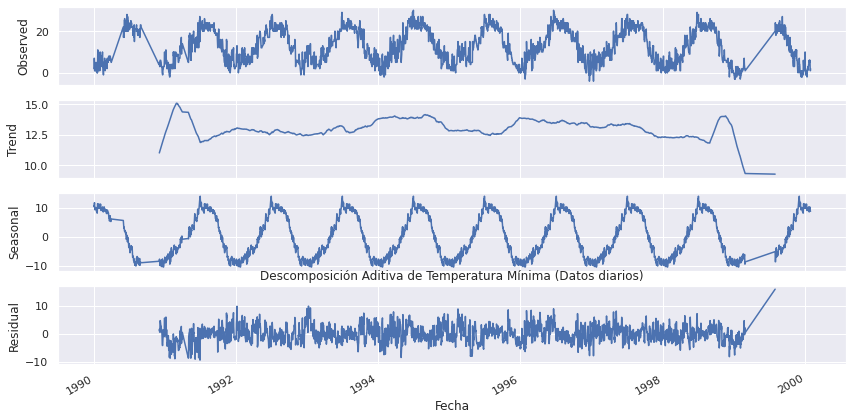

In [45]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1990-01', '2000-01'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmin = sm.tsa.seasonal_decompose(df_36.loc[start:end, 'TMin'].interpolate(), freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Mínima (Datos diarios)');

In [47]:
resTmin.trend.describe()

count    2977.000000
mean       13.012192
std         0.694016
min         9.265753
25%        12.578082
50%        12.950685
75%        13.479452
max        15.083562
Name: TMin, dtype: float64

No se tienen datos de evaporación.

#Actividad 6

Por favor explorar visualmente si se observa un cambio en la distribución de Temperaturas (histogramas y kde), sobreponiendo dos histogramas de dos periodos de 30 años contiguos. Utiliza la función de Seaborn: sns.distplot. Agrega una línea vertical punteada indicando el valor del promedio de cada grupo de datos.

Temperatura Máxima

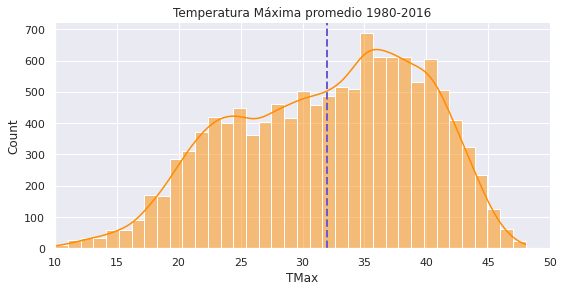

Temperatura máxima promedio del periodo 1980-2016 =  31.97973268529769 ºC
Distribución de la Temperatura Máxima del periodo 1980-2 =  7.548599662393033 ºC


In [50]:
# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_36.TMax, kde=True, color='darkorange', height=4, aspect=2);
plt.axvline(df_36.TMax.mean(), linestyle='--', linewidth=2, color='slateblue');

g1.set(title='Temperatura Máxima promedio 1980-2016');

g1.set(xlim=(10,50))

plt.show();

print('Temperatura máxima promedio del periodo 1980-2016 = ', df_36.TMax.mean(), 'ºC' )

print('Distribución de la Temperatura Máxima del periodo 1980-2 = ', df_36.TMax.std(), 'ºC' )

Temperatura Mínima

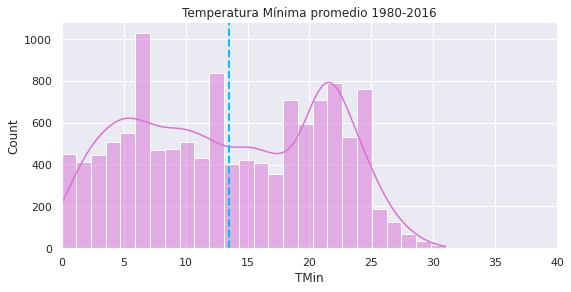

Temperatura mínima promedio del periodo 1980-2016 =  13.467944363577555 ºC
Distribución de la Temperatura Mínima del periodo 1980-2016 =  7.746090482527479 ºC


In [51]:
# Gráfica de distribuciones de Temperaturas Tmin 

g1 = sns.displot(df_36.TMin, kde=True, color='orchid', height=4, aspect=2);
plt.axvline(df_36.TMin.mean(), linestyle='--', linewidth=2, color='deepskyblue');

g1.set(title='Temperatura Mínima promedio 1980-2016');

g1.set(xlim=(0,40))

plt.show();

print('Temperatura mínima promedio del periodo 1980-2016 = ', df_36.TMin.mean(), 'ºC' )

print('Distribución de la Temperatura Mínima del periodo 1980-2016 = ', df_36.TMin.std(), 'ºC' )

No hay datos de evaporación